### Import libraries

In [11]:
from os import getcwd
from os.path import join, abspath, pardir, relpath, exists

import pandas as pd
import numpy as np
from numpy import matrixlib as npmat
import networkx as nx
from typing import Union

from IPython.display import IFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Helper methods

In [32]:
# ------------------------ #
# Helper logging functions
# ------------------------ #
def print_log(text: str) -> None:
    """ Prints the log """
    print(f"[ log ]: {text}")

def print_error(text: str) -> None:
    """ Prints the error """
    print(f"[ error ]: {text}")
# -------------------------------------------------- #
# Helper functions for matrix related operations
# -------------------------------------------------- #
def graph_to_matrix(G: Union[nx.Graph, npmat.matrix]) -> npmat.matrix:
    """
    Converts a graph to a matrix
    """
    return nx.to_numpy_matrix(G) if isinstance(G, nx.Graph) else G

def csv_to_matrix(csv_file: str) -> npmat.matrix:
    """
    Returns a matrix from a csv file
    """
    return npmat.asmatrix(pd.read_csv(csv_file, header=None, on_bad_lines="skip").to_numpy())

def numpy_matrix_to_network_graph(matrix: npmat.matrix) -> nx.Graph:
    """
    Convert from a numpy matrix to a network graph
    """
    return nx.from_numpy_matrix(matrix)

### Documentation

In [29]:
parent_dir = abspath(join(join(getcwd(), pardir), pardir))
data_dir = join(parent_dir, 'data')
data_file = join(data_dir, "data.csv")
# docs_dir = join(parent_dir, 'docs')
# if exists(docs_dir):
#     doc_file = relpath(join(docs_dir, 'practical_works_binary_relations.pdf'))
    # IFrame(doc_file, width=1000, height=250)
matrix = csv_to_matrix(data_file)

### Exercise 1 - Basic Matrix utils

#### 1. Python function converting an Excel file (`.xls` or `.xlsx`) to a `.csv` file.

In [30]:
def excel_to_csv(filename: str) -> None:
    """
    Converts an excel file to a csv file

    Parameters
    ----------
    filename: str
        Filename of the excel file
    """
    df = pd.read_excel(filename)
    df.to_csv(filename.replace(filename.split(".")[-1], "csv"), index=False)

#### 2. Python function showing a graphical representation of this matrix by using appropriate libraries like `networkx` and `matplotlib`.

In [33]:
def plot_graph(graph: Union[npmat.matrix, nx.Graph], **kwargs: dict) -> None:
    """
    Plots a given graph/matrix

    Parameters
    ----------
    matrix: npmat.matrix or nx.Graph
        A numpy matrix or a network graph
    """
    if isinstance(graph, npmat.matrix):
        n_row, n_col = graph.shape
        if n_row != n_col:
            print_error(f"Adjacency matrix not square: nx,ny=({n_row}, {n_col}) [NetworkXError]")
            return
        graph = numpy_matrix_to_network_graph(graph)
    nx.draw(graph, with_labels=True, **kwargs)

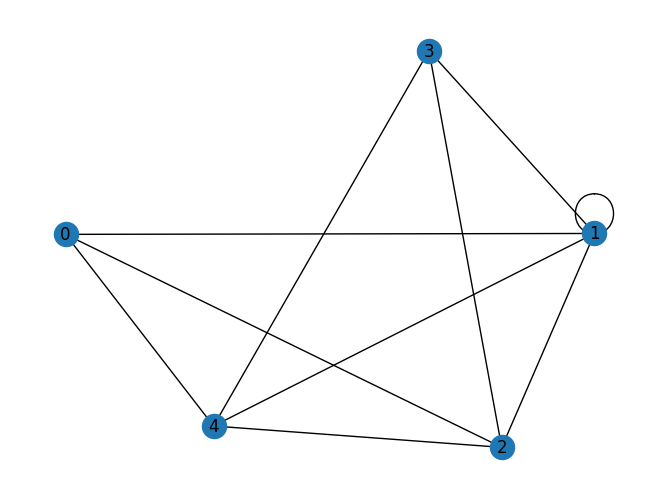

In [34]:
plot_graph(matrix)

### Exercise 2 - Build a Python function `CompleteCheck` testing if a binary relation is _complete_.

In [ ]:
def CompleteCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is complete
    """
    matrix = graph_to_matrix(graph)
    n_row, n_col = matrix.shape
    for i in range(n_row):
        for j in range(n_col):
            if matrix[i, j] == 0 or matrix[i, j] == 0:
                return False
    return True

In [ ]:
CompleteCheck(matrix)

In [ ]:
data_file = join(data_dir, "salaries.xlsx")
excel_to_csv(data_file)

#### Get data

In [ ]:
# parent_dir = abspath(join(join(getcwd(), pardir), pardir))
# data_dir = join(parent_dir, 'data')
# data_file = join(data_dir, 'DM-HT_small.txt')

n_row, n_col = 5, 5
matrix = get_matrix(n_row=n_row, n_col=n_col, seed=0)
matrix

In [ ]:
plot_graph(matrix)

In [ ]:
def completeCheck(matrix):
    matrix_transpose=matrix.transpose()
    matrix_check=matrix+matrix_transpose
    return (np.logical_not(np.any(matrix_check==0)))

In [ ]:
matrix = get_matrix(n_row=n_row, n_col=n_col, seed=0)
matrix
completeCheck(matrix)
CompleteCheck(matrix=matrix)
